In [1]:
# This is a cell to hide code snippets from displaying
# Any cell that contains the word "hide_me" will be hidden.

from IPython.display import HTML

hide_me = ''
HTML('''<script>
code_show=true; 
function code_toggle() {
  if (code_show) {
    $('div.input').each(function(id) {
      if (id == 0 || $(this).html().indexOf('hide_me') > -1) {
        $(this).hide();
      }
    });
    $('div.output_prompt').css('opacity', 0);
  } else {
    $('div.input').each(function(id) {
      $(this).show();
    });
    $('div.output_prompt').css('opacity', 1);
  }
  code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input style="opacity:100" type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Enron Dataset POI Indentifier

## I. Project Overview
In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, a significant amount of typically confidential information entered into the public record, including tens of thousands of emails and detailed financial data for top executives. In this project, I will play detective, and put my new skills to use by building a person of interest (POI) identifier based on financial and email data made public as a result of the Enron scandal. To assist in my detective work, there is a combination of data with a hand-generated list of persons of interest in the fraud case, which means individuals who were indicted, reached a settlement or plea deal with the government, or testified in exchange for prosecution immunity.

In [2]:
hide_me
#!/usr/bin/python

import sys
import pickle
import warnings
warnings.filterwarnings("ignore")
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from tester import test_classifier

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ["poi", "salary", "bonus_salary_ratio", "fraction_from_poi", "fraction_to_poi", "deferral_payments", "total_payments", \
                     "loan_advances", "bonus", "restricted_stock_deferred", "deferred_income", "total_stock_value", \
                     "expenses", "exercised_stock_options", "other", "long_term_incentive", "restricted_stock", \
                     "director_fees", "to_messages", "from_poi_to_this_person", "from_messages", \
                     "from_this_person_to_poi", "shared_receipt_with_poi"] # You will need to use more features

In [4]:
hide_me
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

## II. Data Exploration

In [5]:
hide_me
import pandas as pd
import numpy as np
df = pd.DataFrame(data_dict)
df = df.convert_objects(convert_numeric=True)
df = df.transpose()

In [6]:
hide_me
print ' There are', df.index.size, 'employees in this dataset:'
print list(df.index)

 There are 146 employees in this dataset:
['ALLEN PHILLIP K', 'BADUM JAMES P', 'BANNANTINE JAMES M', 'BAXTER JOHN C', 'BAY FRANKLIN R', 'BAZELIDES PHILIP J', 'BECK SALLY W', 'BELDEN TIMOTHY N', 'BELFER ROBERT', 'BERBERIAN DAVID', 'BERGSIEKER RICHARD P', 'BHATNAGAR SANJAY', 'BIBI PHILIPPE A', 'BLACHMAN JEREMY M', 'BLAKE JR. NORMAN P', 'BOWEN JR RAYMOND M', 'BROWN MICHAEL', 'BUCHANAN HAROLD G', 'BUTTS ROBERT H', 'BUY RICHARD B', 'CALGER CHRISTOPHER F', 'CARTER REBECCA C', 'CAUSEY RICHARD A', 'CHAN RONNIE', 'CHRISTODOULOU DIOMEDES', 'CLINE KENNETH W', 'COLWELL WESLEY', 'CORDES WILLIAM R', 'COX DAVID', 'CUMBERLAND MICHAEL S', 'DEFFNER JOSEPH M', 'DELAINEY DAVID W', 'DERRICK JR. JAMES V', 'DETMERING TIMOTHY J', 'DIETRICH JANET R', 'DIMICHELE RICHARD G', 'DODSON KEITH', 'DONAHUE JR JEFFREY M', 'DUNCAN JOHN H', 'DURAN WILLIAM D', 'ECHOLS JOHN B', 'ELLIOTT STEVEN', 'FALLON JAMES B', 'FASTOW ANDREW S', 'FITZGERALD JAY L', 'FOWLER PEGGY', 'FOY JOE', 'FREVERT MARK A', 'FUGH JOHN L', 'GAHN ROBERT 

In [7]:
hide_me
print '+The number of POIs in the dataset is', df[df.poi == 1].index.size
print list(df[df.poi == 1].index), '\n'
print '+The maximum number of features for each employee is',df.columns.values.size
print 'LIST OF FEATURES OVERVIEW:'
print list(df.columns.values)

+The number of POIs in the dataset is 18
['BELDEN TIMOTHY N', 'BOWEN JR RAYMOND M', 'CALGER CHRISTOPHER F', 'CAUSEY RICHARD A', 'COLWELL WESLEY', 'DELAINEY DAVID W', 'FASTOW ANDREW S', 'GLISAN JR BEN F', 'HANNON KEVIN P', 'HIRKO JOSEPH', 'KOENIG MARK E', 'KOPPER MICHAEL J', 'LAY KENNETH L', 'RICE KENNETH D', 'RIEKER PAULA H', 'SHELBY REX', 'SKILLING JEFFREY K', 'YEAGER F SCOTT'] 

+The maximum number of features for each employee is 21
LIST OF FEATURES OVERVIEW:
['bonus', 'deferral_payments', 'deferred_income', 'director_fees', 'email_address', 'exercised_stock_options', 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances', 'long_term_incentive', 'other', 'poi', 'restricted_stock', 'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi', 'to_messages', 'total_payments', 'total_stock_value']


We can see that we have a total of 146 data points from which we can gain information and insight about the Enron case. Each person has a maximum of 21 features with some of them though having NaN as a value in some features. Lastly the number of POIs in the dataset is 18 however the number of total POIs identified is 35 which are documented in a separate text file. That means what we have not a lot of data to work with and that makes our work on the POI identifier harder.

- **Data Overview (First 5 data points):**

In [8]:
hide_me
df.head(5)

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000.0,2869717.0,-3081055.0,NaN,NaN,1729541.0,13868.0,2195.0,47.0,65.0,...,304805.0,152.0,0.0,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0
BADUM JAMES P,NaN,178980.0,NaN,NaN,NaN,257817.0,3486.0,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,182466.0,257817.0
BANNANTINE JAMES M,NaN,NaN,-5104.0,NaN,NaN,4046157.0,56301.0,29.0,39.0,0.0,...,NaN,864523.0,0.0,1757552.0,-560222.0,477.0,465.0,566.0,916197.0,5243487.0
BAXTER JOHN C,1200000.0,1295738.0,-1386055.0,NaN,NaN,6680544.0,11200.0,NaN,NaN,NaN,...,1586055.0,2660303.0,0.0,3942714.0,NaN,267102.0,NaN,NaN,5634343.0,10623258.0
BAY FRANKLIN R,400000.0,260455.0,-201641.0,NaN,NaN,NaN,129142.0,NaN,NaN,NaN,...,NaN,69.0,0.0,145796.0,-82782.0,239671.0,NaN,NaN,827696.0,63014.0


- Some statistics of features are grouped by **`poi`**:

In [9]:
hide_me
bypoi = df.groupby(['poi'])
bypoi.agg([np.mean])

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
poi,,,,,,,,,,,,,,,,,,,,
0.0,2.446776e+06,1.807789e+06,-1.170917e+06,166804.882353,NaN,5.390155e+06,120149.584416,668.763889,58.500000,36.277778,28775000.0,1.529361e+06,946921.186667,2.322312e+06,166410.555556,601152.500000,1058.527778,2007.111111,4.605105e+06,6.375339e+06
1.0,2.075000e+06,5.198942e+05,-1.035313e+06,NaN,NaN,1.046379e+07,59873.833333,300.357143,97.785714,66.714286,81525000.0,1.204862e+06,802997.388889,2.318621e+06,NaN,383444.882353,1783.000000,2417.142857,7.913590e+06,9.165671e+06


In terms of money-related features, we can see that mean values are higher for person-of-interest in most of the cases.

* Features Statistics:

In [10]:
hide_me
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bonus,82.0,2.374235e+06,1.071333e+07,70000.0,431250.00,769375.0,1200000.00,97343619.0
deferral_payments,39.0,1.642674e+06,5.161930e+06,-102500.0,81573.00,227449.0,1002671.50,32083396.0
deferred_income,49.0,-1.140475e+06,4.025406e+06,-27992891.0,-694862.00,-159792.0,-38346.00,-833.0
director_fees,17.0,1.668049e+05,3.198914e+05,3285.0,98784.00,108579.0,113784.00,1398517.0
email_address,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exercised_stock_options,102.0,5.987054e+06,3.106201e+07,3285.0,527886.25,1310813.5,2547724.00,311764000.0
expenses,95.0,1.087289e+05,5.335348e+05,148.0,22614.00,46950.0,79952.50,5235198.0
from_messages,86.0,6.087907e+02,1.841034e+03,12.0,22.75,41.0,145.50,14368.0
from_poi_to_this_person,86.0,6.489535e+01,8.697924e+01,0.0,10.00,35.0,72.25,528.0
from_this_person_to_poi,86.0,4.123256e+01,1.000731e+02,0.0,1.00,8.0,24.75,609.0


Some features have the problem of inadequate data such as `loan_advances`, `director_fees` and `restricted_stock_deferred`. Also, we notice that count of `email_address` feature is zero. It happens because `email_address` features is string type. It might not be necessary for prediction models. I think we can drop this feature from our dataset.

In [11]:
for employee in data_dict:
    data_dict[employee].pop('email_address')

In [12]:
hide_me
df = pd.DataFrame(data_dict)
df = df.convert_objects(convert_numeric=True)
df = df.transpose()

In [13]:
hide_me
# Import Library for Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Functions to remove underscore from label of a plot
def parse_labels(label):
    words = label.split("_")
    parsed_label = " ".join(words).capitalize()
    return parsed_label

### Dealing with Outliers:

One way to find outliers is by visualizing the data. Here are the histograms of all features

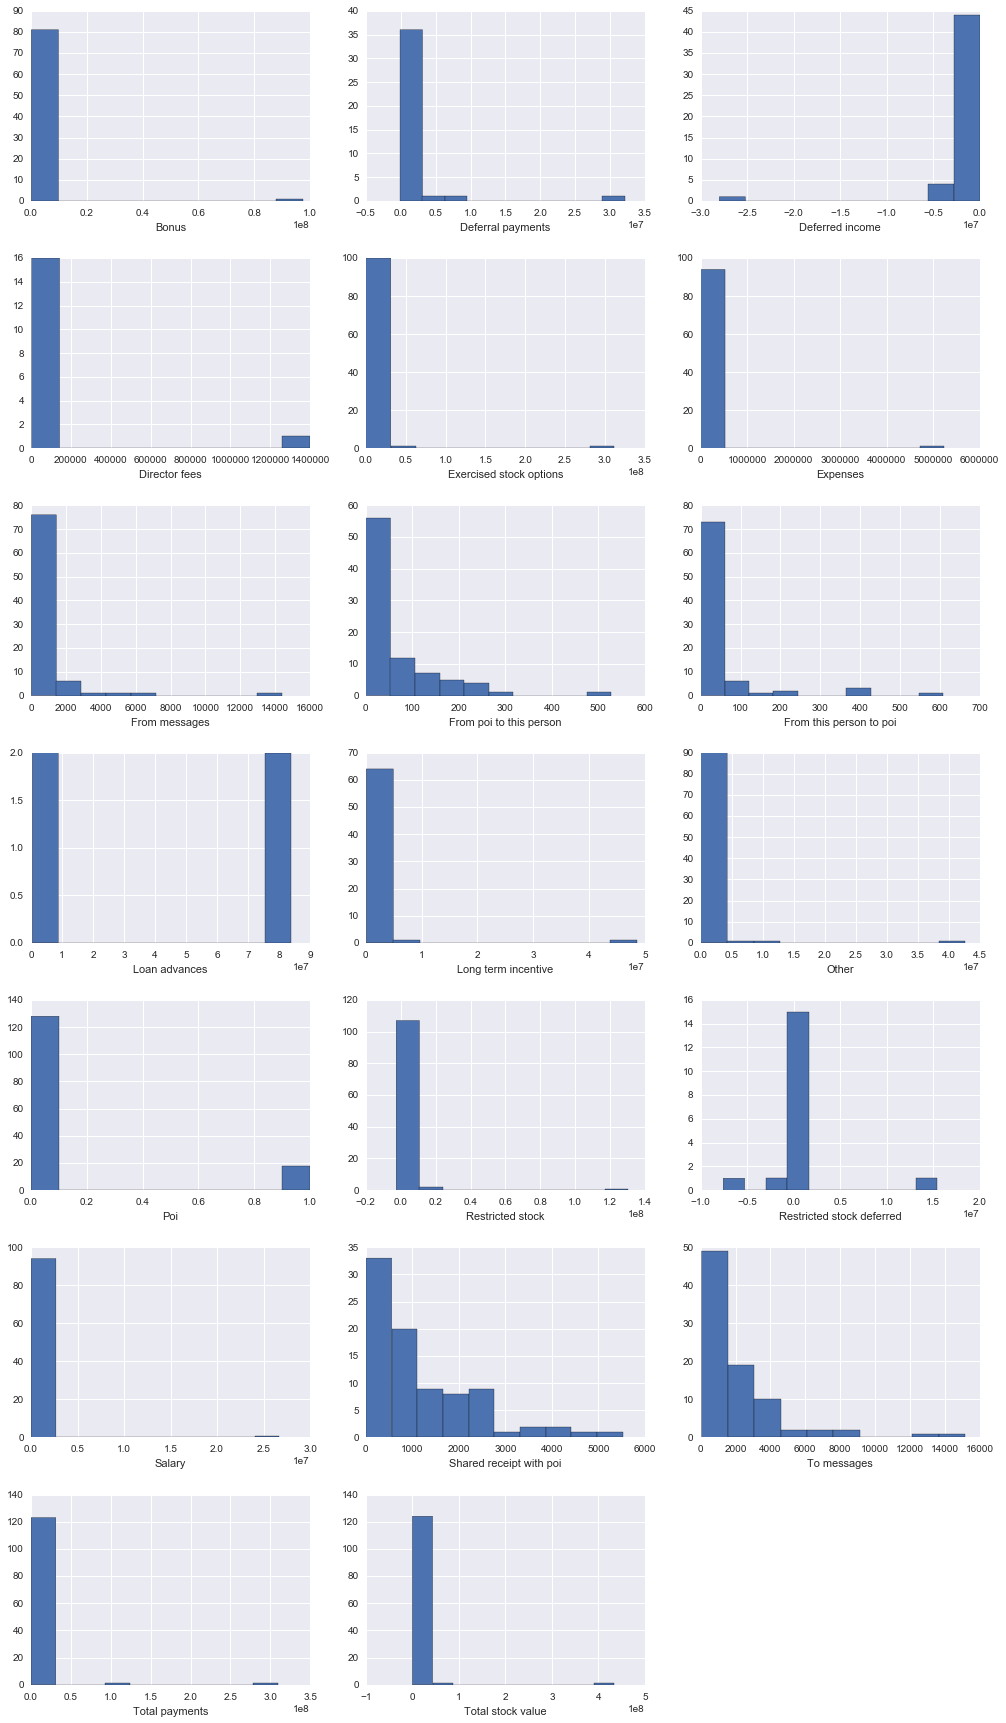

In [14]:
hide_me
plt.figure(figsize=(17, 30))
for i in range(0, len(df.columns.values)):
    plt.subplot(7,3,i+1)
    plt.subplots_adjust(hspace=.3) 
    df[df.columns.values[i]].hist()
    plt.xlabel(parse_labels(df.columns.values[i]))

As we can see that there are a few of suspicious data points that has much higher value than the rests in most of the above histograms. I believe they come from the same data points.
In order to check whether what I believe is right or wrong, I created a function **`visualize_pair_features`** to draw a scatterplot to visualize pairs of features

In [15]:
def visualise_pair_features(feature1, feature2, fig_name):
    plt.scatter(x = df[feature1], y = df[feature2], color = "#FF6666")
    plt.title(fig_name)
    plt.xlabel(parse_labels(feature1))
    plt.ylabel(parse_labels(feature2))

It takes a lot of time to visualize each pair among 21 features. We only need to check with a pair of feature first, then clean the data if we have to. By using the function on the features of "salary" and "bonus" an outlier was spotted. 

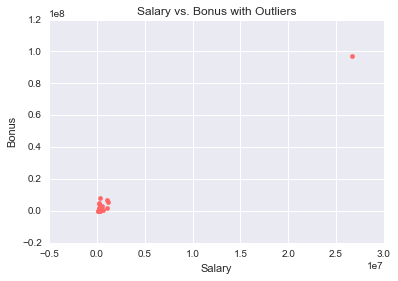

In [16]:
hide_me
visualise_pair_features("salary", "bonus", "Salary vs. Bonus with Outliers")

The outlier of salary and bonus is clearly originated from a shared single data point. Let's find out what it is:

In [17]:
df[df.salary > 2* 1e7]

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
TOTAL,97343619.0,32083396.0,-27992891.0,1398517.0,311764000.0,5235198.0,NaN,NaN,NaN,83925000.0,48521928.0,42667589.0,0.0,130322299.0,-7576788.0,26704229.0,NaN,NaN,309886585.0,434509511.0


In [18]:
df[df.bonus > 0.6 * 1e8]

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
TOTAL,97343619.0,32083396.0,-27992891.0,1398517.0,311764000.0,5235198.0,NaN,NaN,NaN,83925000.0,48521928.0,42667589.0,0.0,130322299.0,-7576788.0,26704229.0,NaN,NaN,309886585.0,434509511.0


After inspecting closely what this outlier might be I figured out that it is the "TOTAL" row from the parsed pdf. That is obviously an error during parsing of the data so it must be removed. There was also another outlier. This time it wasn't an extreme value however in the context of our POI identifier it wasn't needed as it wasn't a person. It was the entry for "THE TRAVEL AGENCY IN THE PARK" which was removed as well.

In [19]:
# Remove error in data
# Update original data
data_dict.pop("TOTAL")
data_dict.pop("THE TRAVEL AGENCY IN THE PARK")

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

In [20]:
hide_me
# Update dataframe with new data
df = pd.DataFrame(data_dict)
df = df.convert_objects(convert_numeric=True)
df = df.transpose()

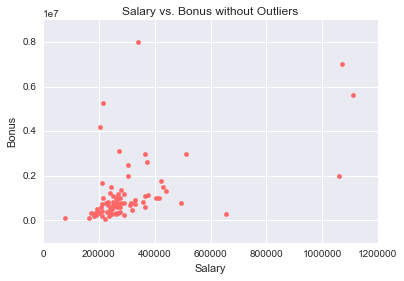

In [21]:
hide_me
visualise_pair_features("salary", "bonus", "Salary vs. Bonus without Outliers")

Obviously, the scatterplot of data is more useful after cleaning errors in data. Let's see how each histogram of each feature are changed:

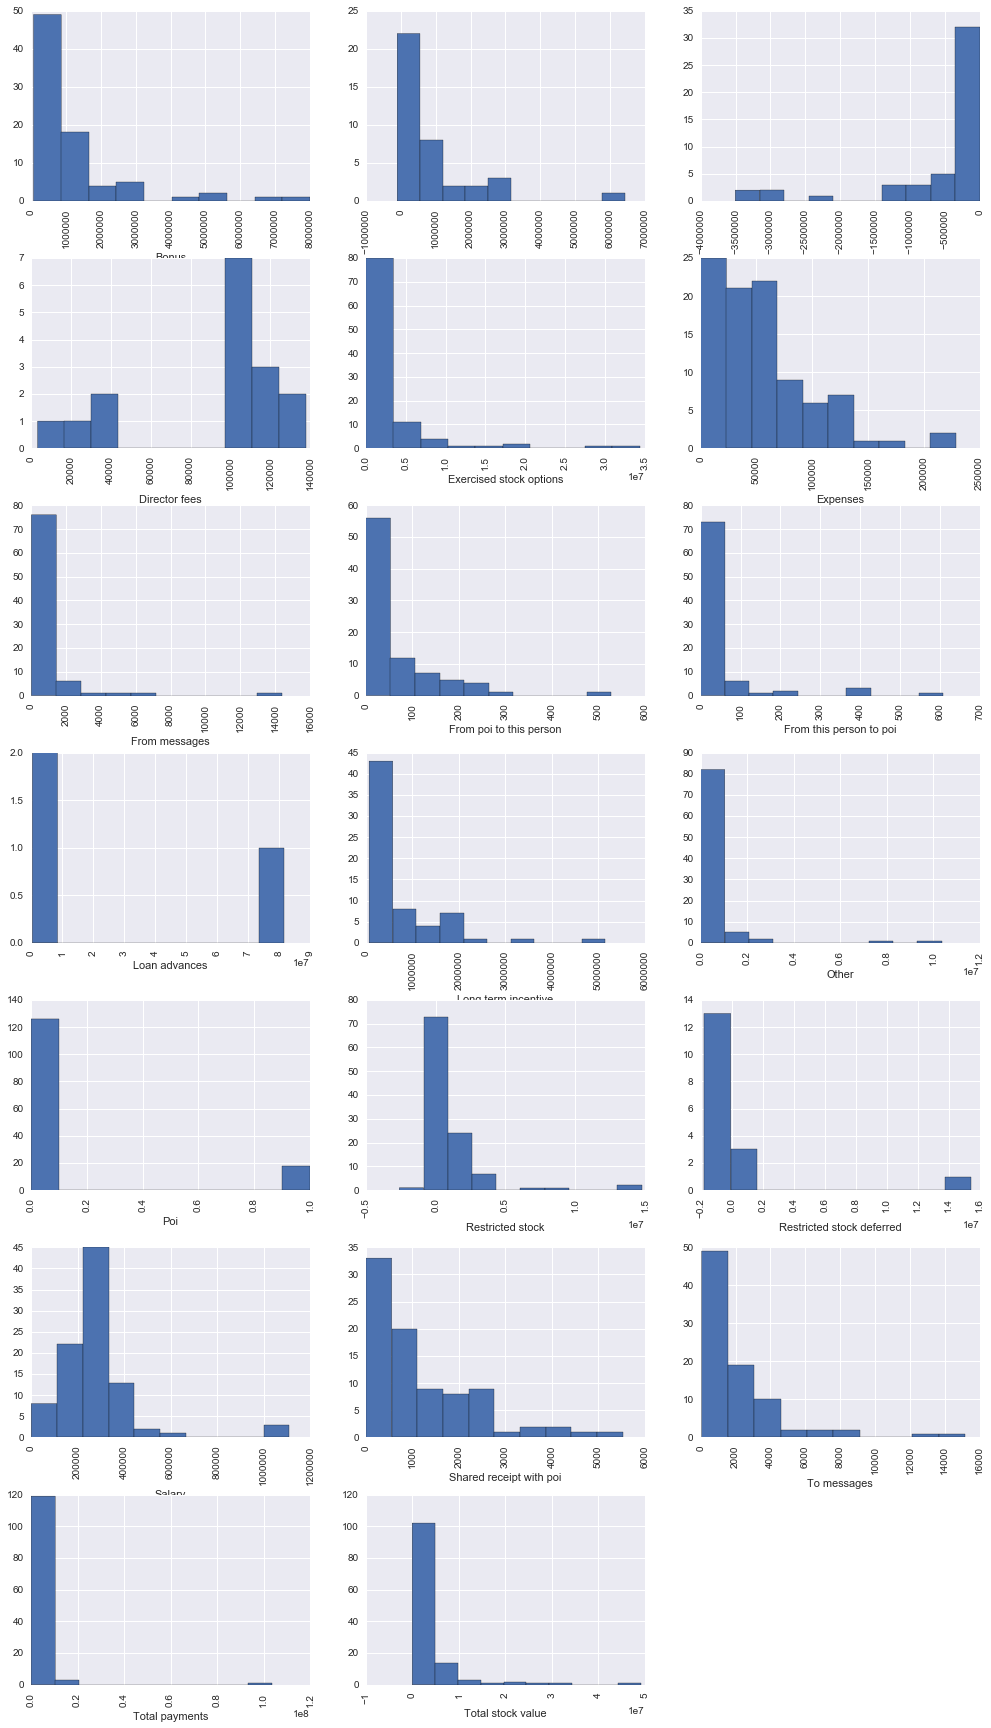

In [22]:
hide_me
plt.figure(figsize=(17, 30))
for i in range(0, len(df.columns.values)):
    plt.subplot(7,3,i+1)
    plt.subplots_adjust(hspace=.3)
    plt.xticks(rotation='vertical')
    df[df.columns.values[i]].hist()
    plt.xlabel(parse_labels(df.columns.values[i]))

Even though outliers still exist in histograms shown above, they look normal enough.
Another way to clean this data is to scrutinize whether each data point matches with condition of each feature. In this project, Udacity has provided us a pdf file **`enron61702insiderpay.pdf`**. This file contains insiders' payment information of all employee in the dataset.
This is a small snapshot of how the file looks like:

![image](https://dl.dropboxusercontent.com/u/27868566/shots/shot_2017-04-22_12-12-53.png)


You can see that columns are categorized into two groups such as Payments and Stock Value:
* In Payments group, **`Total Payments`** is a combination of:
    * `salary`
    * `bonus`
    * `long term incentive`
    * `director fees`
    * `deferred income`
    * `loan advances`
    * `expenses`
    * `other`
    * `salary`
* In Stock Value group, **`Total Stock Value`** is a combination of:
    * `restricted_stock`
    * `exercised_stock_options`
    * `restricted_stock_deferred`
    
Now we can testify whether each data point matches with these two conditions.

In [23]:
hide_me
df = pd.DataFrame(data_dict)
df = df.convert_objects(convert_numeric=True)
df = df.transpose()
df = df.fillna(0)

In [24]:
hide_me
combination1 = ['bonus', 'director_fees', 'deferral_payments',
              'deferred_income','loan_advances', 'long_term_incentive',
              'expenses', 'other', 'salary']
df['condition1'] = df[combination1].sum(axis = 1)

In [25]:
np.where(df['condition1'] <> df['total_payments'])

(array([ 8, 11]),)

After I create a new column **`condition1`**, which is sum of all features in the payment group for each employee, I compare its value with the value of **`total_payemnts`** column

In [26]:
df[['condition1', 'total_payments']].iloc[[8,11]]

,condition1,total_payments
BELFER ROBERT,-99215.0,102500.0
BHATNAGAR SANJAY,275728.0,15456290.0


In [27]:
hide_me
combination1.append('total_payments')
df.iloc[[8,11]][combination1]

,bonus,director_fees,deferral_payments,deferred_income,loan_advances,long_term_incentive,expenses,other,salary,total_payments
BELFER ROBERT,0.0,3285.0,-102500.0,0.0,0.0,0.0,0.0,0.0,0.0,102500.0
BHATNAGAR SANJAY,0.0,137864.0,0.0,0.0,0.0,0.0,0.0,137864.0,0.0,15456290.0


Let's check with the information in the pdf file:
![image](https://dl.dropboxusercontent.com/u/27868566/shots/shot_2017-04-22_21-19-45.png)

We found two data-entry errors. We can fix by the following code:

In [28]:
data_dict['BELFER ROBERT']['deferral_payments'] = 0
data_dict['BELFER ROBERT']['deferred_income'] = -102500
data_dict['BELFER ROBERT']['expenses'] = 3285
data_dict['BELFER ROBERT']['director_fees'] = 102500
data_dict['BELFER ROBERT']['total_payments'] = 3285
data_dict['BHATNAGAR SANJAY']['director_fees'] = 0
data_dict['BHATNAGAR SANJAY']['other'] = 0
data_dict['BHATNAGAR SANJAY']['expenses'] = 137864
data_dict['BHATNAGAR SANJAY']['total_payments'] = 137864

In [29]:
hide_me
df = pd.DataFrame(data_dict)
df = df.convert_objects(convert_numeric=True)
df = df.transpose()
df = df.fillna(0)
combination1 = ['bonus', 'director_fees', 'deferral_payments',
              'deferred_income','loan_advances', 'long_term_incentive',
              'expenses', 'other', 'salary']
df['condition1'] = df[combination1].sum(axis = 1)
df[['condition1', 'total_payments']].iloc[[8,11]]

,condition1,total_payments
BELFER ROBERT,3285.0,3285.0
BHATNAGAR SANJAY,137864.0,137864.0


Now we can confirm that we have fixed the dataset with the first condition. And we need to testify if there is any similar data-entry errors in second condition group (stock values).

In [30]:
hide_me
combination2 = ['restricted_stock', 'exercised_stock_options', 'restricted_stock_deferred']
df['condition2'] = df[combination2].sum(axis = 1)

In [31]:
np.where(df['condition2'] <> df['total_stock_value'])

(array([ 8, 11]),)

In [32]:
hide_me
combination2.append('total_stock_value')
df.iloc[[8,11]][combination2]

,restricted_stock,exercised_stock_options,restricted_stock_deferred,total_stock_value
BELFER ROBERT,0.0,3285.0,44093.0,-44093.0
BHATNAGAR SANJAY,-2604490.0,2604490.0,15456290.0,0.0


Let's check with the information in the pdf file:
![image](https://dl.dropboxusercontent.com/u/27868566/shots/shot_2017-04-23_18-50-21.png)


The data-entry errors also happens with two people Belfer Robert and Bhatnagar Sanjay in stock value section.

We can fix them by following code:

In [33]:
data_dict['BELFER ROBERT']['restricted_stock'] = 44093
data_dict['BELFER ROBERT']['restricted_stock_deferred'] = -44093
data_dict['BELFER ROBERT']['exercised_stock_options'] = 0
data_dict['BELFER ROBERT']['total_stock_value'] = 0
data_dict['BHATNAGAR SANJAY']['restricted_stock'] = 2604490
data_dict['BHATNAGAR SANJAY']['restricted_stock_deferred'] = -2604490
data_dict['BHATNAGAR SANJAY']['exercised_stock_options'] = 15456290
data_dict['BHATNAGAR SANJAY']['total_stock_value'] = 15456290

In [34]:
hide_me
df = pd.DataFrame(data_dict)
df = df.convert_objects(convert_numeric=True)
df = df.transpose()
df = df.fillna(0)
combination2 = ['restricted_stock', 'exercised_stock_options', 'restricted_stock_deferred']
df['condition2'] = df[combination2].sum(axis = 1)
combination2.append('total_stock_value')
df[['condition2', 'total_stock_value']].iloc[[8,11]]

,condition2,total_stock_value
BELFER ROBERT,0.0,0.0
BHATNAGAR SANJAY,15456290.0,15456290.0


**Summary:**
* Remove 1 data point `TOTAL`, which is outlier in the dataset.
* Remove 1 irrelevant data point `THE TRAVEL AGENCY IN THE PARK`
* Fix some errors caused by data-entry mistakes.

**Result:** garbage in, garbage out! I hear this comment almost every other day. It means we cannot build a good prediciting model if our data is not clean. So far we have cleaned inapproriate errors that we have known. If we can find out more errors, we will try to update the our data cleaning process to get a better predicting model.

## III. Creating New Features

Next up three new features were created. One called "fraction_from_poi" which is the fraction of email messages received from a poi to all the messages received and "fraction_to_poi" which is the fraction of email messages sent to a poi to all the messages sent by a given person. My logic states that if a given person has a lot of interaction with a POI then he might be a POI as well so the fraction of messages to and from a POI were computed and used as a feature in the algorithms to follow. And the last feature I want to add is bonus_salary_ratio which combine the effect of bonus and salary as descibed by the above scatterplot.



In [35]:
### Task 3: Create new feature(s)
# Bonus-salary ratio
for employee, features in data_dict.iteritems():
    if features['bonus'] == "NaN" or features['salary'] == "NaN":
        features['bonus_salary_ratio'] = "NaN"
    else:
        features['bonus_salary_ratio'] = float(features['bonus']) / float(features['salary'])

# from_this_person_to_poi as a percentage of from_messages
for employee, features in data_dict.iteritems():
    if features['from_this_person_to_poi'] == "NaN" or features['from_messages'] == "NaN":
        features['fraction_to_poi'] = "NaN"
    else:
        features['fraction_to_poi'] = float(features['from_this_person_to_poi']) / float(features['from_messages'])

# from_poi_to_this_person as a percentage of to_messages
for employee, features in data_dict.iteritems():
    if features['from_poi_to_this_person'] == "NaN" or features['to_messages'] == "NaN":
        features['fraction_from_poi'] = "NaN"
    else:
        features['fraction_from_poi'] = float(features['from_poi_to_this_person']) / float(features['to_messages'])

In [36]:
hide_me
### Store to my_dataset for easy export below.

my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

Here is the visualisation of those two features. 

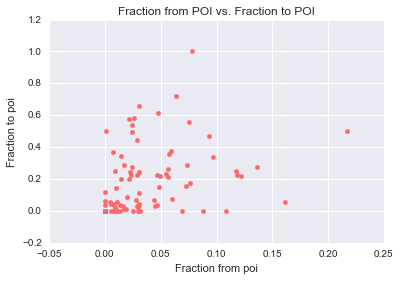

In [37]:
hide_me
hide_me
df = pd.DataFrame(data_dict)
df = df.convert_objects(convert_numeric=True)
df = df.transpose()
df = df.fillna(0)
visualise_pair_features("fraction_from_poi", "fraction_to_poi", "Fraction from POI vs. Fraction to POI")

## IV. Algorithm Implementation

In [38]:
hide_me
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.grid_search import GridSearchCV

/usr/local/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


A pipeline is just an sklearn method to combine transformations and classification into one procedure.

By 'fitting' and 'predicting' with a pipeline, I am asking sklearn to sequentially fit and transform (in the case of transformations) and fit and predict (in the case of classifiers), the model that I have developed.

In each pipeline, I use SelectKBest in a range from 5 to 10 features and use it on three different algorithms.

In [39]:
skb = SelectKBest(f_classif)

nb = GaussianNB()

dt = DecisionTreeClassifier()

rf = RandomForestClassifier()

pca = PCA()

pipeline1 = Pipeline([("kbest", skb), ("nb", nb )])

pipeline2 = Pipeline([("kbest", skb), ("dt", dt )])

pipeline3 = Pipeline([("kbest", skb), ("rf", rf )])

pipeline4 = Pipeline([("kbest", skb), ("PCA", pca ),("dt", dt )])

params1 = {"kbest__k": range(5, 10)}

params2 = {"kbest__k": range(5, 10),
           "dt__min_samples_split": [2, 4, 6],
           "dt__min_samples_leaf": [2, 4, 6],
           "dt__criterion": ["gini", "entropy"]}

params3 = {"kbest__k": range(5, 10),
           "rf__max_depth": [None, 5, 10],
           "rf__n_estimators": [10, 15, 20]}

params4 = {"kbest__k": range(5, 10),
           "PCA__whiten": [True, False],
           "dt__min_samples_split": [2, 4, 6],
           "dt__min_samples_leaf": [2, 4, 6],
           "dt__criterion": ["gini", "entropy"]}

## V. Data Set Split and Validation

If you fit your model using all of your data there is a danger of overfitting (training your model to a specific dataset). So, when you use your model for different data, it may be useless. Instead, you train your model on a portion of your data and validate it on another portion of your data that you didn't use to train the model. This process is called as validation.

In other word, validation is the process of holding out a part of your dataset in order to have a training and a testing dataset in which later you will test your algorithm and validate it's performance.

Therefore I use a cross-validation method like `StratifiedShuffleSplit` that create multiple 'folds' (i.e. multiple train/validation splits of your data) but the purpose is always the same. 'fit' my model on one subset, see how well it performs (validate) on the other subset. The model that performs best in the validation phase is my optimal model.

100 folds were found to be suitable because a bigger number would increase execution time a lot.

In [40]:
hide_me
### Task 5: Tune your classifier to achieve better than .3 precision and recall
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info:
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html


''

In [55]:
sss = StratifiedShuffleSplit(labels, 100, test_size=0.3, random_state=42)

## VI. Algorithm choice and tuning

To avoid having to write code that loops over both the different subsets, and the different parameters for each classifier, there is a method call `GridSearchCV`. A function that works 'as needed' (i.e. as part of a sequence of steps that will work on the data fed to it while at the same time fitting a sequence of operations called a pipeline).

### a) Naive Bayes

Initially I decided to try Naive Bayes for this particular classification problem and in particular GaussianNB. Also, GridSearchCV was used for parameter tuning for both Naive Bayes (which doesn't need tuning though) and the final algorithm that was chosen. Tuning an algorithm which supports parameter tuning is important because each algorithm can't give us the best results available by using its default parameters. In order however to avoid tuning them manually GridSearchCV provides an easy and helpful way to do this automatically and get the best parameters for a given algorithm.

In [293]:
hide_me
pipeline1 = Pipeline([("kbest", skb), ("nb", nb )])
params1 = {"kbest__k": range(5, 10)}
gs = GridSearchCV(pipeline1, params1, n_jobs=-1, cv=sss)
gs.fit(features, labels)

clf = gs.best_estimator_

from tester import test_classifier

print "Tester Classification report"
test_classifier(clf.named_steps["nb"], data_dict, features_list)

features_used = gs.best_estimator_.named_steps["kbest"].get_support(indices=True)
print "A total of %d features were used" % len(features_used)
#Note 1: You use 'features_list[i+1]', instead of 'features_list[i]', 
#because the first feature in that list is 'poi' 
#which you didn't include in the variable 'features'
feature_names = [features_list[i + 1] for i in features_used]
print "The features used are:", feature_names

Tester Classification report
GaussianNB(priors=None)
	Accuracy: 0.76353	Precision: 0.24564	Recall: 0.37350	F1: 0.29637	F2: 0.33828
	Total predictions: 15000	True positives:  747	False positives: 2294	False negatives: 1253	True negatives: 10706

A total of 6 features were used
The features used are: ['salary', 'fraction_to_poi', 'bonus', 'deferred_income', 'total_stock_value', 'exercised_stock_options']


The evaluation metrics of choice was the f1 score which is a weighted average of precision and recall. 

$Precision = \frac{true\ positives}{true\ positives\ +\ false\ positives }$

$Recall = \frac{true\ positives}{true\ positives\ +\ false\ negatives}$

Precision is a measure of exactness and recall is a measure of completeness.

**In the context of this POI identifier, high precision means that when I say that person is POI, I am usually right about it; and high recall means that I can identify most of the POI out there. Recall is about how many POI I've added to my list, out of all the ones that exist.
Ideally, I would want to list all real POI that exist while being careful to not accidentally include some who are not. If I could do that, then I would have both high precision and high recall. It's exactly the situation of high F1-score is**

Due to having set up a pipeline with KBest in it some extra measures had to be taken to identify how many and which features it decided to use.

It turns out that it used 7 features and they were salary, fraction_to_poi, bonus_salary_ratio, bonus, deferred_income, total_stock_value, and exercised_stock_options.

Specifically the test_classifier function was used which was provided by Udacity to evaluate the classifier. **Even though recall is higher than 0.3, the precision is lower than 0.3. It means performance of naive bayes algorithm does not meet the expectation of Udacity**

However there was a really low precision and recall score with GaussianNB so the next choice to try is Decision Trees.



### b) Decision Tree:

With decision tree algorithm, I decide to let GridSearchCV determine the best value for `min_samples_split` in the range between 2 to 10, for `min_samples_leaf` in the range between 2 to 10, and to decide whether `gini` or `entropy` for `criterion`. Note: `min_samples_split` parameter has to be at least 2.   

In [294]:
hide_me
pipeline2 = Pipeline([("kbest", skb), ("dt", dt )])
params2 = {"kbest__k": range(5, 10),
           "dt__min_samples_split": range(2,10),
           "dt__min_samples_leaf": range(2,10),
           "dt__criterion": ["gini", "entropy"]}

gs = GridSearchCV(pipeline2, params2, n_jobs=-1, cv=sss, scoring="f1")
gs.fit(features, labels)
clf= gs.best_estimator_
print "Tester Classification report"
test_classifier(clf.named_steps["dt"], data_dict, features_list)

features_used = gs.best_estimator_.named_steps["kbest"].get_support(indices=True)
print "A total of %d features were used" % len(features_used)
#Note 1: You use 'features_list[i+1]', instead of 'features_list[i]', 
#because the first feature in that list is 'poi' 
#which you didn't include in the variable 'features'
feature_names = [features_list[i + 1] for i in features_used]
#print "The features used are:", feature_names
scores = [clf.named_steps['kbest'].scores_[i + 1] for i in features_used]
#print 'Scores: ', scores
importances = [clf.named_steps['dt'].feature_importances_[i+1] for i in features_used]
#print 'Importance: ', importances
import numpy as np
indices = np.argsort(importances)[::-1]
#print 'Indices: ', indices
for i in range(len(feature_names)):
    print "feature no. {}: {} ({}) ({})".format(i+1, feature_names[indices[i]], importances[indices[i]], scores[indices[i]])


Tester Classification report
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=9,
            min_samples_split=6, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.86247	Precision: 0.47686	Recall: 0.32450	F1: 0.38619	F2: 0.34665
	Total predictions: 15000	True positives:  649	False positives:  712	False negatives: 1351	True negatives: 12288

A total of 9 features were used
feature no. 1: total_stock_value (0.507159967337) (5.41890018941)
feature no. 2: exercised_stock_options (0.121335071968) (4.20243630027)
feature no. 3: long_term_incentive (0.0) (8.82544221992)
feature no. 4: deferred_income (0.0) (22.5105490902)
feature no. 5: bonus (0.0) (0.768146344787)
feature no. 6: total_payments (0.0) (7.18405565829)
feature no. 7: fraction_to_poi (0.0) (0.228859619021)
feature no. 8: bonus_salary_ratio 

Due to having set up a pipeline with SelectKBest, I can identify the number features were used are 9 features: total_stock_value, exercised_stock_options, long_term_incentive, deferred_income, bonus, total_payments, fraction_to_poi, bonus_salary_ratio, salary. Two numbers are next to each feature. The first number is feature importance( fom decision tree classifier) and the second number is feature score(from SelectKBest). The order of features is descending based on feature importance.

Total Stock Value and Exercised Stock Options are two most important features with decision tree classification.
In fact, the cleaning data process have improved the result of model. I just added the part of fixing data entry errors after I review this report and run again. I remember the most important feature for this test was bonus_salary_ratio.

**Summary:**
* **It takes about 3 to 5 minutes o run 100 folds with decision algorithm. I dare not to go further than 100 folds because it takes tons of processing time.**
* **GridSearchCV determined that the best parameters for this algorithm is `{'min_samples_split': 6, 'criterion': 'entropy', 'min_samples_leaf': 9}`**
* **With 100 folds, Precision (0.4786) is much higher than 0.3 and Recall (0.3245) is also higher than 0.3. Therefore not only performance of decision tree is better than performance of naive bayes, it also meets expectation of Udacity**

I'm very curious to see whether there is any improvement if I try scaling the data before using SelectKBest and Decision Tree:

#### MinMaxScaler + DecisionTree

In [295]:
hide_me
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
pipeline2 = Pipeline([("scale", scale), ("kbest", skb), ("dt", dt )])
params2 = {"kbest__k": range(5, 10),
           "dt__min_samples_split": range(2,10),
           "dt__min_samples_leaf": range(2,10),
           "dt__criterion": ["gini", "entropy"]}

gs = GridSearchCV(pipeline2, params2, n_jobs=-1, cv=sss, scoring="f1")
gs.fit(features, labels)
clf= gs.best_estimator_
print "Tester Classification report"
test_classifier(clf.named_steps["dt"], data_dict, features_list)

features_used = gs.best_estimator_.named_steps["kbest"].get_support(indices=True)
print "A total of %d features were used" % len(features_used)
#Note 1: You use 'features_list[i+1]', instead of 'features_list[i]', 
#because the first feature in that list is 'poi' 
#which you didn't include in the variable 'features'
feature_names = [features_list[i + 1] for i in features_used]
#print "The features used are:", feature_names
scores = [clf.named_steps['kbest'].scores_[i + 1] for i in features_used]
#print 'Scores: ', scores
importances = [clf.named_steps['dt'].feature_importances_[i+1] for i in features_used]
#print 'Importance: ', importances
import numpy as np
indices = np.argsort(importances)[::-1]
#print 'Indices: ', indices
for i in range(len(feature_names)):
    print "feature no. {}: {} ({}) ({})".format(i+1, feature_names[indices[i]], importances[indices[i]], scores[indices[i]])


Tester Classification report
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=9,
            min_samples_split=6, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.86127	Precision: 0.47037	Recall: 0.32150	F1: 0.38194	F2: 0.34323
	Total predictions: 15000	True positives:  643	False positives:  724	False negatives: 1357	True negatives: 12276

A total of 9 features were used
feature no. 1: total_stock_value (0.507159967337) (5.41890018941)
feature no. 2: exercised_stock_options (0.121335071968) (4.20243630027)
feature no. 3: long_term_incentive (0.0) (8.82544221992)
feature no. 4: deferred_income (0.0) (22.5105490902)
feature no. 5: bonus (0.0) (0.768146344788)
feature no. 6: total_payments (0.0) (7.18405565829)
feature no. 7: fraction_to_poi (0.0) (0.228859619021)
feature no. 8: bonus_salary_ratio 

**Precision and Recall are nearly unchanged. Therefore scaling does not contribute to any improvement of decision tree algorithm**

If scaling does not show any effect on performance of decision tree algorithm, how about PCA dimension reduction?

####  K-Best + PCA + Decision Tree:

In [296]:
pipeline4 = Pipeline([("kbest", skb), ("PCA", pca ),("dt", dt )])
params4 = {"kbest__k": range(5, 10),
           "PCA__whiten": [True, False],
           "dt__min_samples_split": [2, 4, 6],
           "dt__min_samples_leaf": [2, 4, 6],
           "dt__criterion": ["gini", "entropy"]}
gs = GridSearchCV(pipeline4, params4, n_jobs=-1, cv=sss, scoring="f1")
gs.fit(features, labels)
clf= gs.best_estimator_
print "Tester Classification report"
test_classifier(clf.named_steps["dt"], data_dict, features_list)

features_used = gs.best_estimator_.named_steps["kbest"].get_support(indices=True)
print "A total of %d features were used" % len(features_used)
#Note 1: You use 'features_list[i+1]', instead of 'features_list[i]', 
#because the first feature in that list is 'poi' 
#which you didn't include in the variable 'features'
feature_names = [features_list[i + 1] for i in features_used]
#print "The features used are:", feature_names
scores = [clf.named_steps['kbest'].scores_[i + 1] for i in features_used]
#print 'Scores: ', scores
importances = [clf.named_steps['dt'].feature_importances_[i+1] for i in features_used]
#print 'Importance: ', importances
import numpy as np
indices = np.argsort(importances)[::-1]
#print 'Indices: ', indices
for i in range(len(feature_names)):
    print "feature no. {}: {} ({}) ({})".format(i+1, feature_names[indices[i]], importances[indices[i]], scores[indices[i]])


Tester Classification report
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.83867	Precision: 0.36434	Recall: 0.28200	F1: 0.31793	F2: 0.29535
	Total predictions: 15000	True positives:  564	False positives:  984	False negatives: 1436	True negatives: 12016

A total of 8 features were used
feature no. 1: total_stock_value (0.148423005566) (5.41890018941)
feature no. 2: long_term_incentive (0.0398291925466) (8.82544221992)
feature no. 3: deferred_income (0.0362637362637) (22.5105490902)
feature no. 4: exercised_stock_options (0.0) (4.20243630027)
feature no. 5: bonus (0.0) (0.768146344787)
feature no. 6: fraction_to_poi (0.0) (0.228859619021)
feature no. 7: bonus_salary_ratio (0.0) (3.12809174816)
feature no. 8: salar

**After performing dimension reduction, both Precision and Recall rate are decreased significantly. It means that PCA does not improve performance of decision tree algorithm but also makes it worse.**

Next up are Random Forest.

### d) K-Best + Random Forest:

In [297]:
pipeline3 = Pipeline([("kbest", skb), ("rf", rf )])
params3 = {"kbest__k": range(5, 10),
           "rf__max_depth": [None, 5, 10],
           "rf__n_estimators": [10, 15, 20]}
gs = GridSearchCV(pipeline3, params3, n_jobs=-1, cv=sss, scoring="f1")
gs.fit(features, labels)
clf= gs.best_estimator_
print "Tester Classification report"
test_classifier(clf.named_steps["rf"], data_dict, features_list)

features_used = gs.best_estimator_.named_steps["kbest"].get_support(indices=True)
print "A total of %d features were used" % len(features_used)
#Note 1: You use 'features_list[i+1]', instead of 'features_list[i]', 
#because the first feature in that list is 'poi' 
#which you didn't include in the variable 'features'
feature_names = [features_list[i + 1] for i in features_used]
#print "The features used are:", feature_names
scores = [clf.named_steps['kbest'].scores_[i + 1] for i in features_used]
#print 'Scores: ', scores
importances = [clf.named_steps['rf'].feature_importances_[i+1] for i in features_used]
#print 'Importance: ', importances
indices = np.argsort(importances)[::-1]
#print 'Indices: ', indices
for i in range(len(feature_names)):
    print "feature no. {}: {} ({}) ({})".format(i+1, feature_names[indices[i]], importances[indices[i]], scores[indices[i]])


Tester Classification report
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=15, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
	Accuracy: 0.85800	Precision: 0.41772	Recall: 0.16500	F1: 0.23656	F2: 0.18771
	Total predictions: 15000	True positives:  330	False positives:  460	False negatives: 1670	True negatives: 12540

A total of 9 features were used
feature no. 1: exercised_stock_options (0.0872082695712) (4.20243630027)
feature no. 2: total_stock_value (0.0862874353978) (5.41890018941)
feature no. 3: deferred_income (0.0769450242178) (22.5105490902)
feature no. 4: long_term_incentive (0.0607991095873) (8.82544221992)
feature no. 5: bonus_salary_ratio (0.0395795234386) (3.12809174816)
feature no. 6: salary (0

In previous classification report, we also see the accuracy score. We should try to explain what it means.

Accuracy 85.8% means "out of all my predictions, I can be sure 85.8% are correct", but then since the number of POIs are much less than non-POIs, we can just predict all as non-POIs and we will get very good accuracy.

Therefore it is not the most important metris here, and can even be misleading.

**The most important metrics are precision and recall. Precision is 0.41772 > 0.3 . However, Recall is 0.165 < 0.3. It means that in most of the cases that random forest predict is POI is really POI, but it also misses a lot of POI during prediction. That's why we have low F1 score too.**

Therefore the best algorithm is :

```python
pipeline2 = Pipeline([("kbest", skb), ("dt", dt )])
params2 = {"kbest__k": [9],
           "dt__min_samples_split": [6],
           "dt__min_samples_leaf": [9],
           "dt__criterion": ["entropy"]}

gs = GridSearchCV(pipeline2, params2, n_jobs=-1, cv=sss, scoring="f1")
gs.fit(features, labels)
```

In [56]:
hide_me
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.
pipeline2 = Pipeline([("kbest", skb), ("dt", dt )])
params2 = {"kbest__k": [9],
           "dt__min_samples_split": [6],
           "dt__min_samples_leaf": [9],
           "dt__criterion": ["entropy"]}

gs = GridSearchCV(pipeline2, params2, n_jobs=-1, cv=sss, scoring="f1")
gs.fit(features, labels)
clf= gs.best_estimator_
print "Tester Classification report"
test_classifier(clf.named_steps["dt"], data_dict, features_list)
dump_classifier_and_data(clf.named_steps["dt"], data_dict, features_list)

Tester Classification report
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=9,
            min_samples_split=6, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.86167	Precision: 0.47249	Recall: 0.32200	F1: 0.38299	F2: 0.34391
	Total predictions: 15000	True positives:  644	False positives:  719	False negatives: 1356	True negatives: 12281



## VII. Conclusion:

In the end, I managed to get the prediction model to have 86.2% accuracy in predicting an unknown employee to be POI (Person Of Interest) based on their insider pay and email statistics.
Having high accuracy is not sufficient enough, we need to have a good precision rate and recall rate. The threshold that Udacity used for these two rates are 0.3.
In terms of precision and recall, decision tree algorithm performs the best in indentifying POI.
**Summary of decision tree algoritm:**
* **GridSearchCV determined that the best parameters for this algorithm is **
```
{"kbest__k": [9],
 "dt__min_samples_split": [6],
 "dt__min_samples_leaf": [9],
 "dt__criterion": ["entropy"]}
```
* **Precision is 0.47255**
* **Recall is 0.3185**
* **Due to having set up a pipeline with SelectKBest, I can identify the number features were used are 9 features: total_stock_value, exercised_stock_options, long_term_incentive, deferred_income, bonus, total_payments, fraction_to_poi, bonus_salary_ratio, salary.**
* **Total Stock Value and Exercised Stock Options are two most important features with decision tree classification**

The fure work for this is that I should explore some other algorithms such as AdaBoost and Logistic Regression. In addition, I should learn more of approriate parameters to improve performance of used algorithms.
